# SVM (Support Vector Machine)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

### SVM - 분류

In [4]:
from sklearn.datasets import load_iris

iris_ds = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_ds.data, iris_ds.target, random_state=42)

In [5]:
from sklearn.svm import SVC

svm_clf = SVC(kernel='linear')
svm_clf.fit(X_train, y_train)
svm_clf.score(X_test, y_test)

1.0

In [7]:
X = iris_ds.data[:, :2]
y = iris_ds.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
svm_clf = SVC(kernel='linear', C=1.0) # C : 학습 데이터의 오류 허용 정도
svm_clf.fit(X_train, y_train)
svm_clf.score(X_test, y_test)

0.8421052631578947

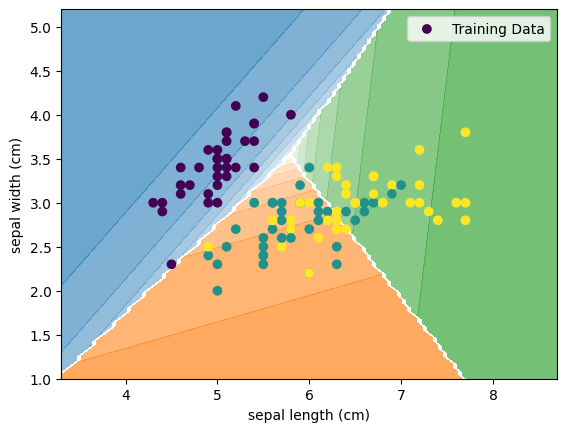

In [9]:
from sklearn.inspection import DecisionBoundaryDisplay

dbd = DecisionBoundaryDisplay.from_estimator(
    svm_clf,
    X_train,
    alpha=0.7,
)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, label='Training Data')
plt.xlabel(iris_ds.feature_names[0])
plt.ylabel(iris_ds.feature_names[1])
plt.legend()
plt.show()

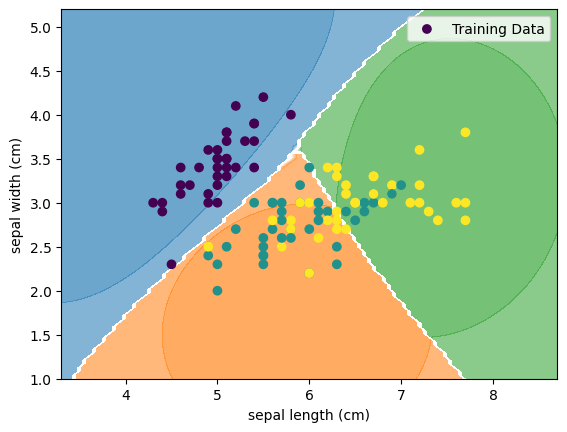

In [10]:
svm_clf = SVC(kernel='rbf', C=1.0) # C : 학습 데이터의 오류 허용 정도
svm_clf.fit(X_train, y_train)
svm_clf.score(X_test, y_test)

dbd = DecisionBoundaryDisplay.from_estimator(svm_clf, X_train, alpha=0.7)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, label='Training Data')
plt.xlabel(iris_ds.feature_names[0])
plt.ylabel(iris_ds.feature_names[1])
plt.legend()
plt.show()

### [참고] SVM의 분류와 회귀
- 아래 표 불러오기

### SVR - 회귀

In [12]:
np.random.seed(0)

X = np.sort(np.random.rand(40, 1) * 5, axis=0)
y = np.sin(X).ravel() + np.random.randn(40) * 0.1

X_test = np.linspace(0, 5, 100).reshape(-1, 1)

In [20]:
from sklearn.svm import SVR

svr_rbf = SVR(kernel='rbf')     # RBF 커널
svr_lin = SVR(kernel='linear')  # 선형 커널
svr_poly = SVR(kernel='poly')   # 다항 커널

svr_rbf.fit(X, y)
svr_lin.fit(X, y)
svr_poly.fit(X, y)

rbf_pred = svr_rbf.predict(X_test)
lin_pred = svr_lin.predict(X_test)
poly_pred = svr_poly.predict(X_test)

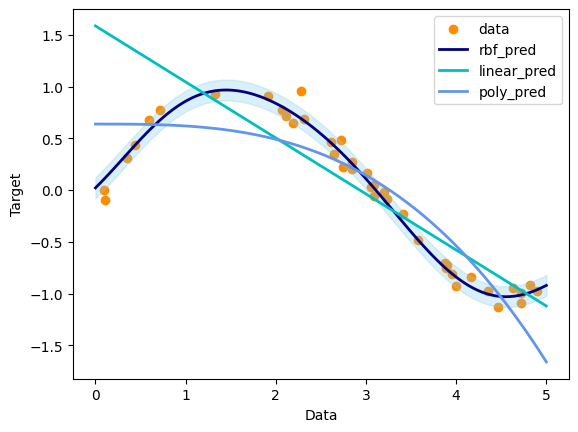

In [21]:
plt.scatter(X, y, color='darkorange', label='data')

plt.plot(X_test, rbf_pred, color='navy', lw=2, label='rbf_pred')
plt.plot(X_test, lin_pred, color='c', lw=2, label='linear_pred')
plt.plot(X_test, poly_pred, color='cornflowerblue', lw=2, label='poly_pred')

# 하이퍼파라미터로 줄 수 있음. 기본값은 0.1

svr_rbf_epsilon = svr_rbf.epsilon
epslion_upper = rbf_pred + svr_rbf_epsilon
epslion_lower = rbf_pred - svr_rbf_epsilon
plt.fill_between(X_test.ravel(), epslion_lower, epslion_upper, color='skyblue', alpha=0.3)

plt.xlabel('Data')
plt.ylabel('Target')
plt.legend()
plt.show()

##### [한번 해보기] 캘리포니아 주택 가격 예측

In [28]:
# 1. 데이터 로드
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

housing_ds = fetch_california_housing()

In [41]:
# 2. 데이터 분리 및 스케일링
X_train, X_test, y_train, y_test = train_test_split(housing_ds.data, housing_ds.target, random_state=42)

x_standard_scaler = StandardScaler()
X_train = x_standard_scaler.fit_transform(X_train)
X_test = x_standard_scaler.transform(X_test)

y_standard_scaler = StandardScaler()
y_train = y_standard_scaler.fit_transform(y_train.reshape(-1, 1)).ravel()
y_test = y_standard_scaler.transform(y_test.reshape(-1, 1)).ravel()

In [44]:
# 3. SVR 모델 훈련
svr_reg = SVR(kernel='rbf', C=1.0, epsilon=0.1)    # RBF 커널
svr_reg.fit(X_train, y_train)

,"kernel kernel: {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'} or callable, default='rbf'Specifies the kernel type to be used in the algorithm.If none is given, 'rbf' will be used. If a callable is given it isused to precompute the kernel matrix.For an intuitive visualization of different kernel typessee :ref:`sphx_glr_auto_examples_svm_plot_svm_regression.py`",'rbf'
,"degree degree: int, default=3Degree of the polynomial kernel function ('poly').Must be non-negative. Ignored by all other kernels.",3
,"gamma gamma: {'scale', 'auto'} or float, default='scale'Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.- if ``gamma='scale'`` (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,- if 'auto', uses 1 / n_features- if float, must be non-negative... versionchanged:: 0.22 The default value of ``gamma`` changed from 'auto' to 'scale'.",'scale'
,"coef0 coef0: float, default=0.0Independent term in kernel function.It is only significant in 'poly' and 'sigmoid'.",0.0
,"tol tol: float, default=1e-3Tolerance for stopping criterion.",0.001
,"C C: float, default=1.0Regularization parameter. The strength of the regularization isinversely proportional to C. Must be strictly positive.The penalty is a squared l2. For an intuitive visualization of theeffects of scaling the regularization parameter C, see:ref:`sphx_glr_auto_examples_svm_plot_svm_scale_c.py`.",1.0
,"epsilon epsilon: float, default=0.1Epsilon in the epsilon-SVR model. It specifies the epsilon-tubewithin which no penalty is associated in the training loss functionwith points predicted within a distance epsilon from the actualvalue. Must be non-negative.",0.1
,"shrinking shrinking: bool, default=TrueWhether to use the shrinking heuristic.See the :ref:`User Guide `.",True
,"cache_size cache_size: float, default=200Specify the size of the kernel cache (in MB).",200
,"verbose verbose: bool, default=FalseEnable verbose output. Note that this setting takes advantage of aper-process runtime setting in libsvm that, if enabled, may not workproperly in a multithreaded context.",False
,"max_iter max_iter: int, default=-1Hard limit on iterations within solver, or -1 for no limit.",-1


In [45]:
# 4. predict()로 예측값 -> mean_squared_error (MSE)로 평가
train_mse = mean_squared_error(y_train, svr_reg.predict(X_train))
test_mse = mean_squared_error(y_test, svr_reg.predict(X_test))

print(f'MSE | train : {train_mse}, test : {test_mse}')

MSE | train : 0.0027618565411651184, test : 0.0027720043173116407


In [31]:
california_ds = fetch_california_housing()

df = pd.DataFrame(california_ds.data, columns=california_ds.feature_names)
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000
